# ナスダック指数 週足 移動メディアン

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

code = 'IXIC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,11517.190430,11699.629883,11273.610352,11689.009766,25178450000,0.0,0.0
2023-03-06 00:00:00-05:00,11736.870117,11827.919922,11093.860352,11138.889648,26746960000,0.0,0.0
2023-03-13 00:00:00-04:00,11041.459961,11773.110352,10982.799805,11630.509766,31049050000,0.0,0.0
2023-03-20 00:00:00-04:00,11614.389648,12013.990234,11550.690430,11823.959961,24063200000,0.0,0.0
2023-03-27 00:00:00-04:00,11868.540039,12227.929688,11635.030273,12221.910156,23120800000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,19234.039062,19969.169922,19204.949219,19627.439453,37116520000,0.0,0.0
2025-02-03 00:00:00-05:00,19215.380859,19862.539062,19141.150391,19523.400391,35852770000,0.0,0.0
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24 00:00:00-05:00,8744.030273,8904.110352,8264.160156,8567.370117,9879920000,0.0,0.0
2020-03-02 00:00:00-05:00,8667.139648,9070.320312,8375.129883,8575.620117,20277070000,0.0,0.0
2020-03-09 00:00:00-04:00,7957.930176,8347.400391,7194.669922,7874.879883,23104400000,0.0,0.0
2020-03-16 00:00:00-04:00,7392.729980,7422.200195,6686.359863,6879.520020,24512120000,0.0,0.0
2020-03-23 00:00:00-04:00,6847.279785,7809.830078,6631.419922,7502.379883,21476910000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,19234.039062,19969.169922,19204.949219,19627.439453,37116520000,0.0,0.0
2025-02-03 00:00:00-05:00,19215.380859,19862.539062,19141.150391,19523.400391,35852770000,0.0,0.0
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0


In [3]:
period = 13
r_last = len(df0)
r1 = 0
df0['MM13'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm13 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM13'] = mm13
    r1 += 1

In [4]:
period = 26
r_last = len(df0)
r1 = 0
df0['MM26'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm26 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM26'] = mm26
    r1 += 1

In [5]:
period = 52
r_last = len(df0)
r1 = 0
df0['MM52'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm52 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM52'] = mm52
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MM13,MM26,MM52
Date,,,,,,,,,,
2020-02-24 00:00:00-05:00,8744.030273,8904.110352,8264.160156,8567.370117,9879920000,0.0,0.0,NaN,NaN,NaN
2020-03-02 00:00:00-05:00,8667.139648,9070.320312,8375.129883,8575.620117,20277070000,0.0,0.0,NaN,NaN,NaN
2020-03-09 00:00:00-04:00,7957.930176,8347.400391,7194.669922,7874.879883,23104400000,0.0,0.0,NaN,NaN,NaN
2020-03-16 00:00:00-04:00,7392.729980,7422.200195,6686.359863,6879.520020,24512120000,0.0,0.0,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,6847.279785,7809.830078,6631.419922,7502.379883,21476910000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,19234.039062,19969.169922,19204.949219,19627.439453,37116520000,0.0,0.0,19572.599609,18504.080078,17689.120117
2025-02-03 00:00:00-05:00,19215.380859,19862.539062,19141.150391,19523.400391,35852770000,0.0,0.0,19621.679688,18599.364258,17701.489258
2025-02-10 00:00:00-05:00,19668.179688,20045.759766,19415.480469,20026.769531,43161600000,0.0,0.0,19621.679688,18841.884766,17720.279297


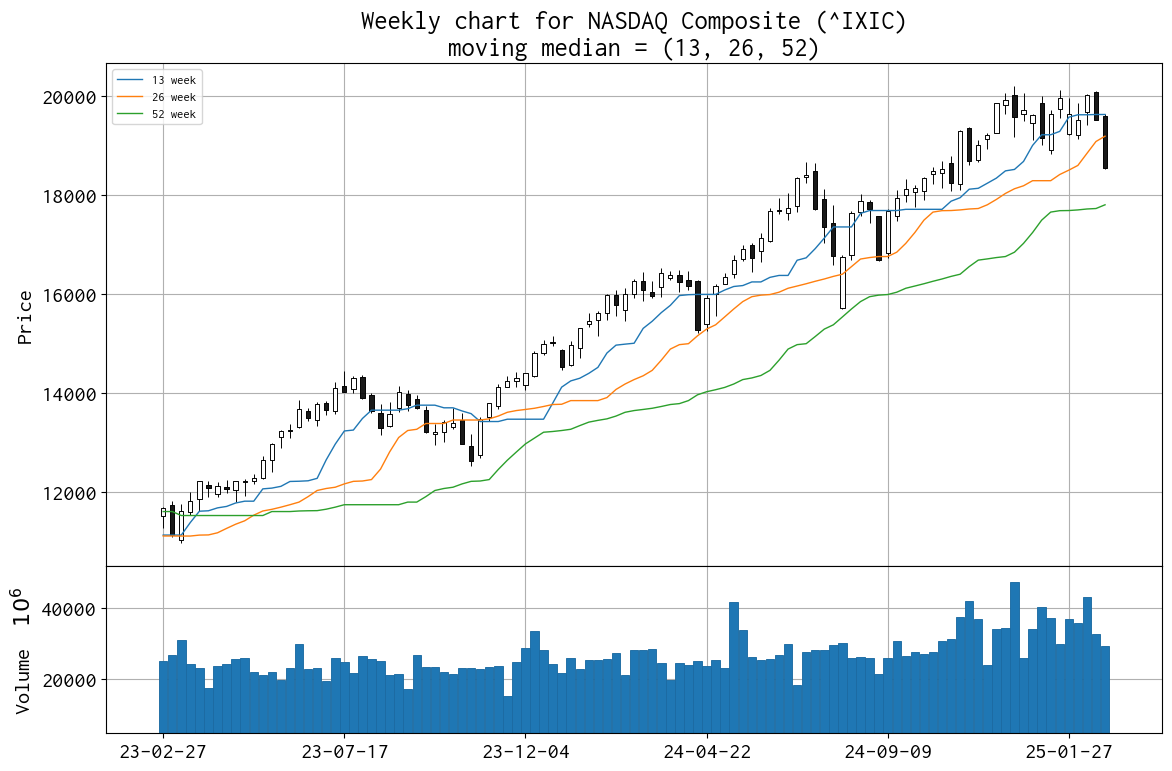

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm13 = df0['MM13']
mm26 = df0['MM26']
mm52 = df0['MM52']
apds  = [
    mpf.make_addplot(mm13[df.index], width=1, label='13 week', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=1, label='26 week', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=1, label='52 week', ax=ax[0]),
]

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_%s.png' % code)
plt.show()

In [7]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,20090.550781,20110.119141,19510.910156,19524.009766,32644990000,0.0,0.0
2025-02-24 00:00:00-05:00,19590.849609,19644.230469,18535.224609,18544.417969,29290431000,0.0,0.0


In [8]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    19524.009766
2025-02-24 00:00:00-05:00    18544.417969
Name: Close, dtype: float64

In [9]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -979.591797
Name: Close, dtype: float64

In [10]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -1046.431641
dtype: float64

In [11]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00-05:00    19481.929838
2025-02-03 00:00:00-05:00    19500.131460
2025-02-10 00:00:00-05:00    19603.719952
2025-02-17 00:00:00-05:00    19643.747596
2025-02-24 00:00:00-05:00    19591.920523
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00-05:00    18669.427209
2025-02-03 00:00:00-05:00    18776.277194
2025-02-10 00:00:00-05:00    18868.394456
2025-02-17 00:00:00-05:00    18931.710637
2025-02-24 00:00:00-05:00    18963.664438
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    17685.353816
2025-02-03 00:00:00-05:00    17753.291128
2025-02-10 00:00:00-05:00    17835.043419
2025-02-17 00:00:00-05:00    17902.873986
2025-02-24 00:00:00-05:00    17946.517785
Name: Close, dtype: float64